# Lista 1 - ML

### Questão 2 (problem 1.5 LFD):

Referências:
    * https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
    * https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
    * http://www.bogotobogo.com/python/scikit-learn/Single-Layer-Neural-Network-Adaptive-Linear-Neuron.php
    * https://www.kdnuggets.com/2016/08/role-activation-function-neural-network.html
    * http://equipe.nce.ufrj.br/thome/p_grad/nn_ic/transp/T4_perceptron_adaline.pdf
    * https://en.wikipedia.org/wiki/ADALINE
    * https://linguagensdeprogramacao.wordpress.com/2011/09/03/adaline-em-python-redes-neurais-artificiais/
    * http://www.bogotobogo.com/python/scikit-learn/Single-Layer-Neural-Network-Adaptive-Linear-Neuron.php
    * https://stats.stackexchange.com/questions/285772/what-is-weights-in-perceptron
    * https://stats.stackexchange.com/questions/142146/using-adaptive-linear-neurons-adalines-and-perceptrons-for-0-1-class-problems

In [382]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [383]:
def targetFunction(x1,y1,x2,y2,x3,y3):
    '''
    função para definir, através do polyfit, a TARGET FUNCTION
    '''
    X = [1, x3, y3]
    x = [x1, x2]
    y = [y1, y2]
    
    a, b = np.polyfit(x, y , deg=1)
        
    x_reta = [-1, x1, x2, 1]
    y_reta = [(a*x + b) for x in x_reta]
    # b + ax - y = 0
    # w0 + w1*x + w2*y = 0
    #portanto: w0 = b ; w1 = a ; w2 = -1
    
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)

    w0 = b
    w1 = a
    w2 = -1
    w = [w0, w1, w2]
    z = 0
    
    z = np.dot(X, w)
    
    return [w, x_reta, y_reta, polynomial, np.sign(z)]


def gera_reta_pontos(N):
    '''
    função para gerar aleatoriamente uma target (reta definida por 2 pontos) e classificar N pontos em função dessa target
    '''
    
    x1, y1, x2, y2 = random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)
    points = []
  
    for i in range(N):
        x, y = round(random.uniform (-1, 1),2), round(random.uniform (-1, 1),2)
        X = [1, x, y]
        tgf = targetFunction(x1, y1, x2, y2, x, y)
        points.append((X, tgf[-1]))
    
    x_acima=[]
    x_abaixo=[]

    y_acima=[]
    y_abaixo=[]

    y_abaixo_class=[]
    y_acima_class=[]
    
    for i,j in points:
        if j == -1:
            x_abaixo.append(i[1])
            y_abaixo.append(i[2])
            y_abaixo_class.append(j)
        else:
            x_acima.append(i[1])
            y_acima.append(i[2])
            y_acima_class.append(j)
    
    abaixo = list(zip(x_abaixo,y_abaixo,y_abaixo_class))
    acima = list(zip(x_acima,y_acima,y_acima_class))
    tudo = (abaixo + acima)

    plt.ylim(-1,1)
    plt.xlim(-1,1)

    plt.plot(x_abaixo,y_abaixo,'b.')
    plt.plot(x_acima,y_acima,'r.')
    plt.plot(tgf[1],tgf[2],marker='o',color='black')
    
    print('y =',tgf[-2])
    return tgf[0], points

def gera_reta_pontos2(x1, y1, x2, y2, N):
    '''
    função para gerar aleatoriamente uma target (reta definida por 2 pontos) e classificar N pontos em função dessa target
    '''
    points = []
  
    for i in range(N):
        x, y = round(random.uniform (-1, 1),2), round(random.uniform (-1, 1),2)
        X = [1, x, y]
        tgf = targetFunction(x1, y1, x2, y2, x, y)
        points.append((X, tgf[-1]))
    
    x_acima=[]
    x_abaixo=[]

    y_acima=[]
    y_abaixo=[]

    y_abaixo_class=[]
    y_acima_class=[]
    
    for i,j in points:
        if j == -1:
            x_abaixo.append(i[1])
            y_abaixo.append(i[2])
            y_abaixo_class.append(j)
        else:
            x_acima.append(i[1])
            y_acima.append(i[2])
            y_acima_class.append(j)
    
    abaixo = list(zip(x_abaixo,y_abaixo,y_abaixo_class))
    acima = list(zip(x_acima,y_acima,y_acima_class))
    tudo = (abaixo + acima)

    plt.ylim(-1,1)
    plt.xlim(-1,1)

    plt.plot(x_abaixo,y_abaixo,'b.')
    plt.plot(x_acima,y_acima,'r.')
    plt.plot(tgf[1],tgf[2],marker='o',color='black')
    
    #print('y =',tgf[-2])
    return tgf[0], points


def percep_ada(points, iter_lim, eta = 1):
    
    w = [0, 0, 0]
    
    acertos = 0
    itera = 0
    apoio = []
    erros = []
            
    # inicio do algoritmo pra calcular os novos pesos
    for k in range(0, iter_lim):
        
        pt, target_pt = random.choice(points)
                       
        #s = np.sign(np.dot(pt,w))
        s = np.dot(pt,w)
                          
        if s * target_pt > 1:
            if pt not in apoio:
                acertos += 1
                apoio.append(pt)
                erros.append(0)
                itera += 1
        else:
            e = target_pt - s
            erros.append(e)
            #perceptron adaline
            w[0] += eta * e * pt[0]
            w[1] += eta * e * pt[1]
            w[2] += eta * e * pt[2]

            '''
            #perceptron padrão
            w[0] += target_pt * pt[0]
            w[1] += target_pt * pt[1]
            w[2] += target_pt * pt[2]
            '''      
            itera += 1

        if  itera == iter_lim or acertos == len(points):
            break
            
    plt.plot(erros, 'blue')
        
    return itera, w

            
def prob_errar(x1, y1, x2, y2, W, tentativas):
    '''
    função para calcular a prob. de erro,
    usando a frequencia de vezes nas quais o dot product de uma g aleatória não bate com o resultado da target function
    '''
    erros = 0
    for i in range(0, tentativas):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        X = [1, x, y]

        if targetFunction(x1, y1, x2, y2, x, y)[-1] != np.sign(np.dot(X, W)):
            erros += 1
    
    return round(erros/float(tentativas),2)

            
def modelo(runs, qtd_pontos, iter_lim):
    '''
    runs = quantidade de runs
    qtd_pontos = quantidade de pontos
    iter_lim = limite de iterações
    '''
    iteracoes = []
    prob_erro = []
    
    for t in range(0, runs):
        x1, y1, x2, y2 = random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)
        
        #points = gera_reta_pontos(qtd_pontos)
        _,points = gera_reta_pontos2(x1, y1, x2, y2, qtd_pontos)
        
        iter_count, w = percep_ada(points, iter_lim)
        
        error_probability = prob_errar(x1, y1, x2, y2, w, runs)
        
        iteracoes.append(iter_count)        
        prob_erro.append(error_probability)
        
    plt.close()

    print("Média de iteracoes: " + str(np.mean(iteracoes)))
    print("Média prob erro: " + str(np.mean(prob_erro)))

y =  
-0.06173 x + 0.4769
Vetor w: [0.47692995216716011, -0.061729431779328402, -1]


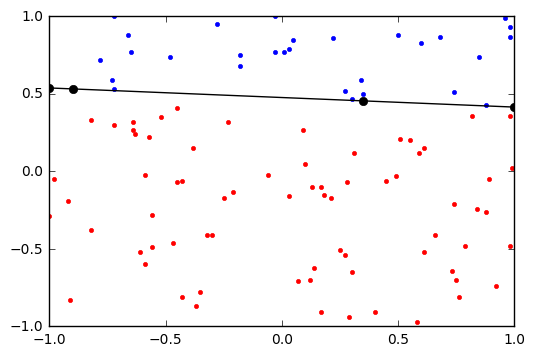

In [384]:
w, train = gera_reta_pontos(100)
print('Vetor w:', w)

In [385]:
test = []
for i in range(10**4):
        x, y = round(random.uniform (-1, 1),2), round(random.uniform (-1, 1),2)
        X = [1, x, y]
        test.append((X,np.sign(np.dot(X,w))))

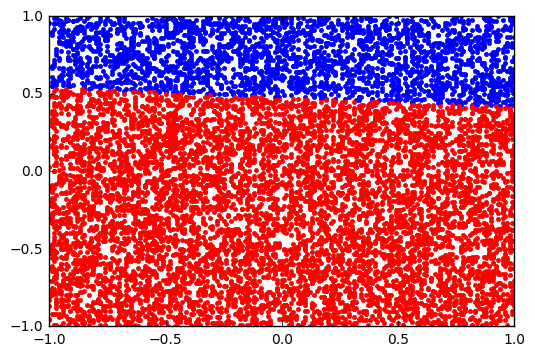

In [386]:
x_acima=[]
x_abaixo=[]

y_acima=[]
y_abaixo=[]

y_abaixo_class=[]
y_acima_class=[]
    

for i,j in test:
    if j == -1:
        x_abaixo.append(i[1])
        y_abaixo.append(i[2])
        y_abaixo_class.append(j)
    else:
        x_acima.append(i[1])
        y_acima.append(i[2])
        y_acima_class.append(j)
    
abaixo = list(zip(x_abaixo,y_abaixo,y_abaixo_class))
acima = list(zip(x_acima,y_acima,y_acima_class))
tudo = (abaixo + acima)

plt.ylim(-1,1)
plt.xlim(-1,1)

plt.plot(x_abaixo,y_abaixo,'b.')
plt.plot(x_acima,y_acima,'r.')

181 [129013771206.23599, -46208846259.166603, -253292984389.31555]


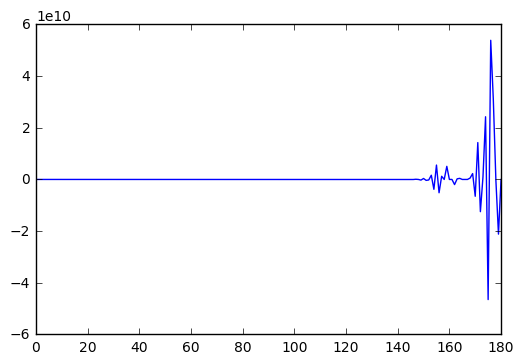

In [387]:
it1, wper = percep_ada(train,1000, 3)
print(it1, wper)

In [388]:
def gera_percep_reta(train, iter_lim, eta):

    it1, wper = percep_ada(train, iter_lim, eta)
    print(it1, wper)
    plt.close()
    
    x_acima=[]
    x_abaixo=[]

    y_acima=[]
    y_abaixo=[]

    y_abaixo_class=[]
    y_acima_class=[]

    #para plotar base de treino
    for i,j in train:
        if j == -1:
            x_abaixo.append(i[1])
            y_abaixo.append(i[2])
            y_abaixo_class.append(j)
        else:
            x_acima.append(i[1])
            y_acima.append(i[2])
            y_acima_class.append(j)

    #para plotar a target f
    xf = [-1,1]
    yf = [ w[1]*i + w[0] for i in xf]

    #para plotar a hipotese final g
    xg = [-1, 1]
    yg = [ (wper[1]/-wper[2])*i + wper[0]/-wper[2] for i in xg]

    #plt.figure(figsize=(8,5))
    plt.ylim(-1,1)
    plt.xlim(-1,1)

    plt.plot(x_abaixo,y_abaixo,'b.')
    plt.plot(x_acima,y_acima,'r.')
    plt.plot(xf, yf, marker='o',color='black', linewidth=1.5)
    plt.plot(xg, yg, marker='o',color='green',linewidth=1.5)

180 [4.600513589041979, -0.48707546988567341, -8.9654606951210116]


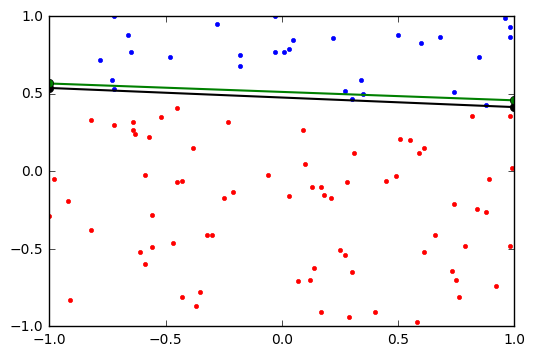

In [399]:
gera_percep_reta(train, 1000, 1)